# Table of Contents
* [1. Abstract](#1.-Abstract)
* [2. Introduction](#2.-Introduction)
	* [2.1 Background](#2.1-Background)
	* [2.2 Introductory thoughts](#2.2-Introductory-thoughts)
	* [2.3 Checklist](#2.3-Checklist)
* [3. Experimental and computational details](#3.-Experimental-and-computational-details)
	* [3.1 Parameters](#3.1-Parameters)
	* [3.2 Initialize analysis framework](#3.2-Initialize-analysis-framework)
* [4. Synthesis guide](#4.-Synthesis-guide)
	* [4.1 Extinction spectra for a range of core and shell diameters](#4.1-Extinction-spectra-for-a-range-of-core-and-shell-diameters)
		* [4.1.1 Computation](#4.1.1-Computation)
		* [4.1.2 Spectral plots](#4.1.2-Spectral-plots)
		* [4.1.3 LSPR analysis](#4.1.3-LSPR-analysis)


Core-shell metal-polymer nanoparticles for plasmonic crystals with lattice-coupled resonances
==============================================================================================

Optical cross sections using Mie theory 

Original analysis 28 April 2016  
Import to Python and updated 1 August 2016

# 1. Abstract

Colloidal Au- or Ag-PNIPAM core-shell nanoparticles (NPs) can be synthesized with a range of diameters for the core (using sequential overgrowth) and separately for the shell (using different polymer weights). Typical diameters are 5-100 nm for the cores and 150-1000 nm for the shell. Under certain conditions, the NPs will self-assemble into highly ordered plasmonic crystals with face-centered cubic symmetry. These crystals show pronounced Bragg diffraction peaks, but it is now of interest whether they can also support lattice plasmons, a.k.a., surface lattice resonances (SLRs). This analysis computes the optical properties of individual Au-PNIPAM NPs, first as an aid to synthesis. In order to determine the correct core-shell dimensions for lattice plasmons, the scattered fields are then compared to a sample which is known to host lattice plasmons, Ag-PNIPAM NPs (diameters 100-360) in a 2D hexagonal array in an optically homogeneous PNIPAM matrix. The extinction cross sections are used to determine the maximum scattering cell thickness for which light can reasonable transmit. Lastly, the coupled dipole approximation is used to estimate the spectrum of the plasmonic NPs. With these computations, we give recommended core and shell sizes for observing lattice plasmon coupling in 3D crystals.

# 2. Introduction

## 2.1 Background

These NPs and synthetic protocals have several advantages: 
- crystalline metal cores have superior plasmonic properties over particles cut from deposited metal films; 
- polymer shells and sequential overgrowth lead to highly homgeneous morphology (spherical) and size distribution ($<10\%$ polydispersity);
- self-assembly of crystalline (2D or 3D) structures from polymer shell interactions, cores have little effect;
- optics from metal cores, shells act as dielectric spacers reducing short-range plasmon coupling;
- highly scalable protocols for large-area or -volume applications (such as printing);
- highly ordered self-assembled structures with sharp Bragg diffraction peaks (3D).

Some of the new functionalities possible with plasmonic crystal NPs:
- plasmonics means intense near-fields, good for local sensing and strong interactions with quantum emitters at room temperature, potential for nanolasing;
- plasmonic NPs have large optical cross-sections, good for efficient far-field light-pumping;
- crystalline structure introduces additional tuning parameter on plasmonic resonances (LSPRs).

Foundational works:
- Dulle et al (2015), <http://dx.doi.org/10.1039/C4CP04816D>
- Rauh et al (2016), <http://dx.doi.org/10.1007/s00396-015-3782-6>
- Honold et al (2015), <http://dx.doi.org/10.1039/C5TC02115D>
- Volk et al (2015), <http://dx.doi.org/10.1002/adma.201503672>

## 2.2 Introductory thoughts

Colloidal metal-polymer core-shell nanoparticles (NPs) are introducing new photonic functionalities to wet-chemically synthesized and self-assembled structures. 

While most chemically-prepared systems focus on near-field coupling, one interesting facet of these NPs is the possibility for long-range plasmonic coupling. Near-field coupling happens at surface-to-surface distance scales less than about a diameter, and it is highly distance dependent. These multiparticle modes are highly lossy and typically occur at wavelengths in the infrared or longer. In ordered structures, however, scattered fields at frequencies near the lattice resonances allow coupling between NPs at distance scales significantly more than a NP diameter. In addition, they can be highly photonic in nature, that is with narrow resonace shapes and correspondingly lower losses. This presents some interesting opportunities for plasmonic inroads into traditionally photonic applications, such as lasing and other coherent emitter interactions. 

The hybrid resonances that result from LSPRs interacting over lattice modes are called variously lattice plasmons or surface lattice resonances (SLRs). Until recently, they have only been observed in 2D lithographically prepared samples. Recent progress with Au/Ag-PNIPAM NPs demonstrated self-assembled 2D hexagonal lattices have similar or superior optical properties. Since 3D assemblies are also possible with this class of properties, here we assess the feasability of observing similar lattice plasmon resonances in 3D. First we compute the dilute single-NP properties as an aid during synthesis for rapid determination of the core size. Then we compare the scattered fields to those of the 2D assemblies. We also use the optical cross sections to estimate the transmitted light through scattering cells. Finally, we used the coupled dipole approximation (CDA) to estimate the optical properties of an assembled plasmonic crystal with face-centered cubic (FCC) symmetry.

## 2.3 Checklist

- Synthesis guide
    - Estimate core and shell size from LSPR peak position
    - Compute the ratio of LSPR to shell scattering: 
        - determine when shell scattering dominates, making LSPR not observable
- Scattered fields
    - Compute scattered field strength as a function of distance
    - Compare to model system: 100-nm-diameter Ag NPs in uniform PNIPAM matrix
    - Determine minimum core size for onset of lattice coupling
    - Determine transmission as a function of crystal thickness
        - estimate maximum cuvet cell thickness
- Lattice plasmons
    - Compute extinction spectra for a range of core and shell sizes
    - Determine core/shell sizes compatible with lattice plasmons
    - Relate spectra to lattice modes (diffraction)

# 3. Experimental and computational details

## 3.1 Parameters

- Synthesis protocols and structural analysis available in previous works
  - Spherical cores and shells
  - Core diameters $d_{\text{core}}=$ 5-95 nm
  - Shell diameters $d_{\text{shell}}=$ 100-500 nm
  - Au cores, with refractive index (RI) $n_{\text{Au}}$ from J&C 1972
  - Swollen PNIPAM shells are mostly solvent (water), so $n_{\text{pNIPAM}} = n_{\text{H2O}} + 0.04$
    - estimated from previous works
  - Relevant LSPR wavelengths $\lambda=$ 350-750 nm
- Additional design rules
  - Desire minimum Au NP core size for large-scale synthesis (reduce expense)

## 3.2 Initialize analysis framework

In [1]:
%run "header.py"

Loading import modules ...
Loading analysis codes ... 
  ... refractive index functions loaded:
       Au, Ag, SiO2, ITO, ZnO, H2O, 
       ethanol, CS2, benzene, toluene, 
       chloroform, methanol, butanol, 
       propanol
  ... Mie functions loaded
  ... local Mie functions loaded
Ready player one.


In [2]:
%run "header_parallel.py"

Initializing cluster ...
   Client variable 'kernels'
   Cluster Direct View variable 'cluster'
   Variable 'nKernels' = 4
importing mie on engine(s)
importing mie_local on engine(s)


# 4. Synthesis guide

## 4.1 Extinction spectra for a range of core and shell diameters

Using sequential overgrowth protocols, the core and shell size of core-shell Au@PNIPAM NPs in suspension in water can be grown to specific sizes with low polydispersity. The extinction spectrum is strongly dependent on the NP size and can be used as for rapid determinatin of the core and shell size. This computation calculates the extinction spectra for a range of core and shell diameters to facilitate that determination.

### 4.1.1 Computation

Initialize and compute extinction spectra. 

In [226]:
print("Set parameter limits for computation")
print("====================================")

# parameter limits
rCoreMinnm, rCoreMaxnm, drCorenm = 2.5, 51., 1.25
rShellMinnm, rShellMaxnm, drShellnm = 25, 251, 12.5
wl0Minnm, wl0Maxnm, dwl0nm = 350, 751, 2.5
lmax = 5
cpuTimeSec = 0.965e-3

# check for lmax convergence
lmaxConvergeTable = []
for rCorenm in [rCoreMinnm, rCoreMaxnm]:
    for rShellnm in [rShellMinnm, rShellMaxnm]:
        result = mie_local.CextRelDipEMList(mie_local.CextEMListAuGelH2O(lmax, rCorenm, rShellnm, wl0Minnm))
        lmaxConvergeTable.append(result[0])
        lmaxConvergeTable.append(result[1])
print("Highest pole =",lmax,", max est. err. = ", format(100*max(lmaxConvergeTable), '.3f'),"%")

rCoreListnm = np.arange(rCoreMinnm, rCoreMaxnm, drCorenm)
rCoreMaxnm = np.amax(rCoreListnm)
rShellListnm = np.arange(rShellMinnm, rShellMaxnm, drShellnm)
rShellMaxnm = np.amax(rShellListnm)
wl0Listnm = np.arange(wl0Minnm, wl0Maxnm, dwl0nm)
wl0Maxnm = np.amax(wl0Listnm)
print("Actual parameter ranges:")
print("  core radius (nm):",[rCoreMinnm, rCoreMaxnm],"x",drCorenm)
print("  shell radius (nm):",[rShellMinnm, rShellMaxnm],"x",drShellnm)
print("    (shell radius will not be less than core radius)")
print("  vacuum wavelength (nm):",[wl0Minnm, wl0Maxnm],"x",dwl0nm)

# contruct parameter list
paramList = []
for rCorenm in rCoreListnm:
    for rShellnm in rShellListnm:
        for wl0nm in wl0Listnm:
            if rShellnm < rCorenm: rShellnm = rCorenm + 0.1 # Shell radius cannot be less than core radius
            paramList.append([rCorenm, rShellnm, wl0nm])
paramArray = np.asarray(paramList)
Nsims = paramArray.shape[0]
print("Number of simulation instances = ", Nsims)
nProcs = nKernels
if nProcs == 0: nProcs = 1
print("  running on",nProcs,"processors")
print("  estimated",format(cpuTimeSec*1e3, '.3f'),"ms per instance")
print("Estimated run time = ",format(cpuTimeSec*Nsims/nProcs, '.3f'),"sec")

Set parameter limits for computation
Highest pole = 5 , max est. err. =  1.062 %
Actual parameter ranges:
  core radius (nm): [2.5, 50.0] x 1.25
  shell radius (nm): [25, 250.0] x 12.5
    (shell radius will not be less than core radius)
  vacuum wavelength (nm): [350, 750.0] x 2.5
Number of simulation instances =  119301
  running on 4 processors
  estimated 0.965 ms per instance
Estimated run time =  28.781 sec


In [227]:
# Compute extinction cross section
print("Compute extinction spectra, parallel kernels")
print("============================================")
# return: vacuum wavelength (nm), 
#         core diameter (nm), 
#         shell diameter (nm), 
#         total scattering efficiency
#         total absorption efficiency
#         total extinction efficiency
def calcAtom(params):
    [rCorenm, rShellnm, wl0nm] = params
    [Cext,Cabs,Csca] = mie_local.CExtAbsScaAuGelH2O(lmax, rCorenm, rShellnm, wl0nm)
    return [wl0nm, 2*rCorenm, 2*rShellnm, mie.Qeff(rCorenm,Csca), mie.Qeff(rCorenm,Cabs), mie.Qeff(rCorenm,Cext)]

# distribute atom definition to parallel kernels
cluster.push(dict(
        lmax = lmax,
        calcAtom = calcAtom
    ))

# Loop over parameters
print("Computing ... ", end="")
startSec = time.time()
spectraAuLSPRList = list(cluster.map_sync(calcAtom, paramArray))
endSec = time.time()
print("done")
dtSec = endSec - startSec
spectraAuLSPRArray = np.asarray(spectraAuLSPRList)
Ncalcs = spectraAuLSPRArray.shape[0]
print("Run time = ", format(dtSec, '.3f'),"sec")
print("Time per simulation instance = ", format(1000*dtSec*nProcs/Ncalcs, '.3f'),"ms")

Compute extinction spectra, parallel kernels
Computing ... done
Run time =  23.965 sec
Time per simulation instance =  0.804 ms


### 4.1.2 Spectral plots

Initial assessment of the computations, including  
1. a sample extinction spectrum (which parameters is set in the code);
2. 3D/color plots of all extinction spectra for a given shell diameter;  
3. 3D/color plots of all extinction spectra for a given core diameter.  


*Notes* 
- For scaling convenience, the extinction efficiency $Q_{\mathrm{ext}}$ is used instead of the extinction cross section $\sigma_{\mathrm{ext}}$. The efficiency is related to the cross section by $Q_{\mathrm{ext}} = \sigma_{\mathrm{ext}}/\left(\pi r_{\mathrm{core}}^2\right)$.  
- By default, svg graphics are exported. These can be opened with a browser and easily edited with Inkscape. Change the code to change the export format to, e.g., png. Block export by commenting out lines.

Sample spectrum
Exported to:
 graphics_sample-spectrum_20160818.svg


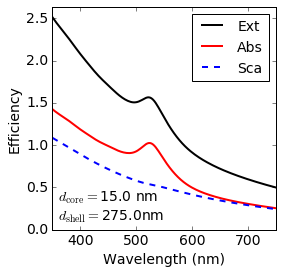

In [228]:
print('Sample spectrum')
print('===============')
def plotAndSave ():   
    ## Input data
    dCorenm = 2*rCoreListnm[4]
    dShellnm = 2*rShellListnm[9]
    sortByShell = spectraAuLSPRArray[:,2] == dShellnm
    plotArray = spectraAuLSPRArray[sortByShell]
    sortByCore = plotArray[:,1] == dCorenm
    plotArray = plotArray[sortByCore]
    x, y, yAbs, ySca = plotArray[:,0], plotArray[:,-1], plotArray[:,-2], plotArray[:,-3]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [0, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    ## Specific format options
    pylab.plot(x, y, color='black', linewidth=2, label="Ext")
    pylab.plot(x, yAbs, color='red', linewidth=2, label="Abs")
    pylab.plot(x, ySca, '--', color='blue', linewidth=2, label="Sca")
    pylab.xlabel("Wavelength (nm)")
    pylab.ylabel("Efficiency")
    figText = '$d_{\mathrm{core}}=$'+str(dCorenm)+' nm'+'\n'+'$d_{\mathrm{shell}}=$'+str(dShellnm)+'nm'
    pylab.text(xLimits[0]+0.025*dx, yLimits[0]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    pylab.legend(loc='upper right', fontsize=14)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics_"+"sample-spectrum_" + timestamp + exportFormat
    pylab.savefig(filename, transparent=True)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


Extinction efficiency
3D/color graphs by shell diameter
shell diameter greater than core diameter only
Shell diameter 100.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=100.0-nm.svg


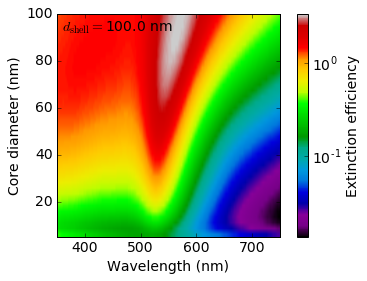

Shell diameter 125.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=125.0-nm.svg


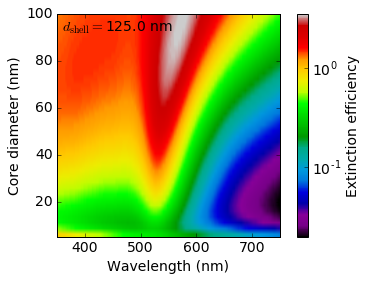

Shell diameter 150.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=150.0-nm.svg


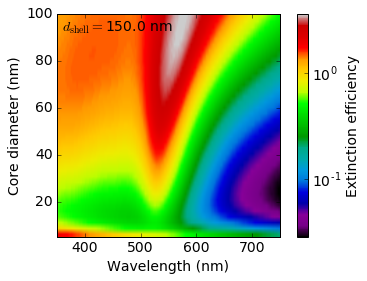

Shell diameter 175.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=175.0-nm.svg


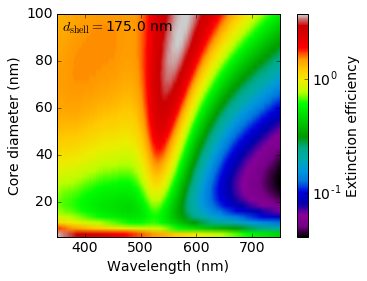

Shell diameter 200.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=200.0-nm.svg


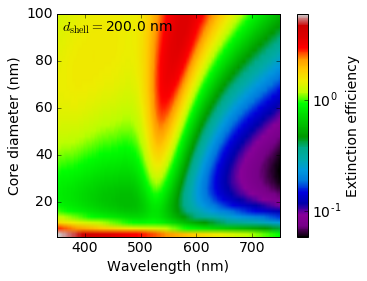

Shell diameter 225.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=225.0-nm.svg


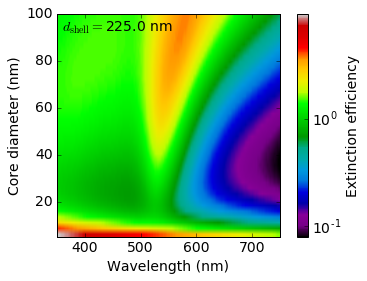

Shell diameter 250.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=250.0-nm.svg


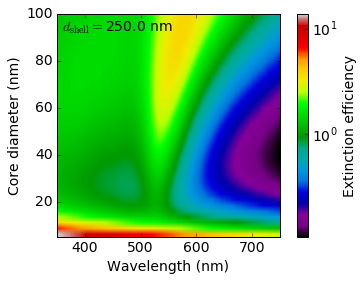

Shell diameter 275.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=275.0-nm.svg


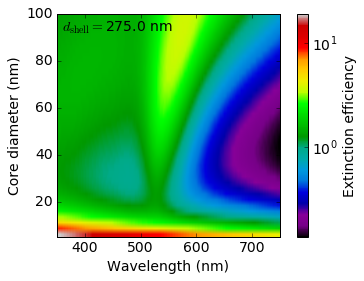

Shell diameter 300.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=300.0-nm.svg


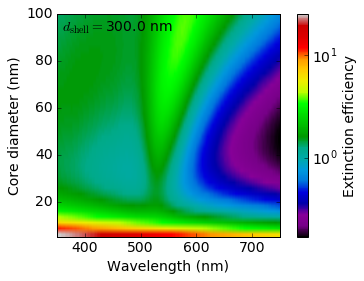

Shell diameter 325.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=325.0-nm.svg


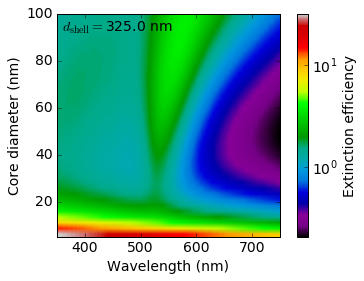

Shell diameter 350.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=350.0-nm.svg


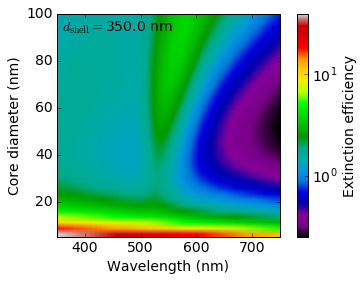

Shell diameter 375.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=375.0-nm.svg


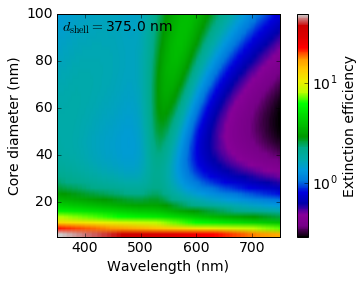

Shell diameter 400.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=400.0-nm.svg


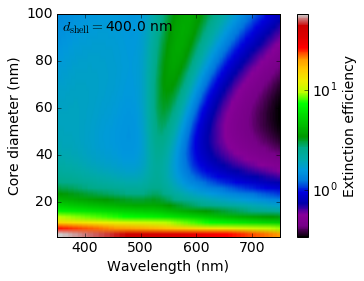

Shell diameter 425.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=425.0-nm.svg


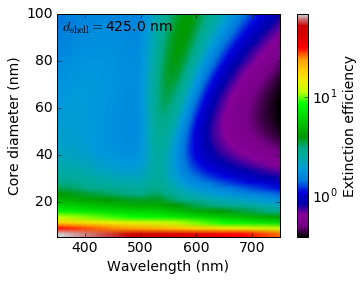

Shell diameter 450.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=450.0-nm.svg


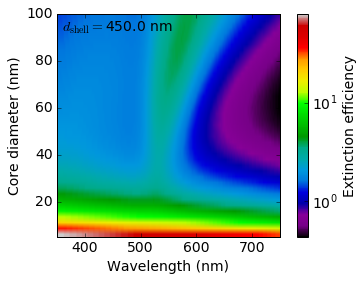

Shell diameter 475.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=475.0-nm.svg


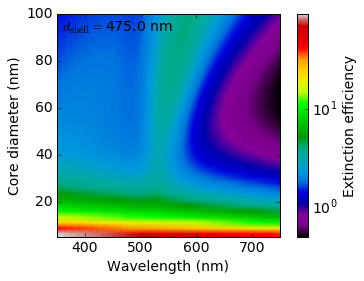

Shell diameter 500.0 nm
Exported to:
 graphics_ext-3d-color_vs_core-size+wavelength_20160818/shell-size=500.0-nm.svg


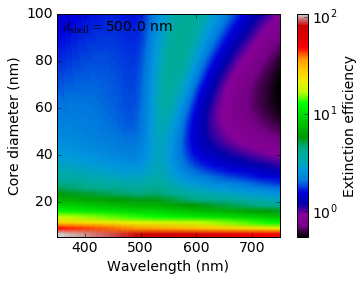

In [241]:
print('Extinction efficiency')
print('3D/color graphs by shell diameter')
print('=================================')
print('shell diameter greater than core diameter only')
dShellLargerListnm = rShellListnm >= np.amax(rCoreListnm)
dShellLargerListnm = 2*rShellListnm[dShellLargerListnm]
for dShellnm in dShellLargerListnm:
    print("Shell diameter "+str(dShellnm)+" nm")
    def plotAndSave (): 
        ## Input data
        sortByShell = spectraAuLSPRArray[:,2] == dShellnm
        plotArray = spectraAuLSPRArray[sortByShell]
        x,y,z = plotArray[:,0], plotArray[:,1], plotArray[:,-1]
        xLimits = [np.amin(x), np.amax(x)]
        yLimits = [np.amin(y), np.amax(y)]
        dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
        zLimits = [np.amin(z), np.amax(z)]
        z = np.reshape(z, (rCoreListnm.size,wl0Listnm.size))

        ## Specific format options
        plot = pylab.imshow(z,extent=(xLimits[0],xLimits[1],yLimits[1],yLimits[0]),cmap=cm.spectral, norm=LogNorm())
        pylab.xlabel("Wavelength (nm)")
        pylab.ylabel("Core diameter (nm)")
        zLabel = "Extinction efficiency"
        figText = '$d_{\mathrm{shell}}=$'+str(dShellnm)+' nm'
        pylab.text(xLimits[0]+0.025*dx, yLimits[1]-0.025*dy, figText, verticalalignment='top', horizontalalignment='left')

        ## General format options
        aspectRatio = dx/dy
        figWidthcm = 8.9
        figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
        fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
        pylab.subplot(111)
        pylab.rcParams.update({'font.size': 14})
        pylab.axes().set_aspect(aspectRatio)
        pylab.xlim(xLimits[0], xLimits[1])
        pylab.ylim(yLimits[0], yLimits[1])
        pylab.locator_params(nbins=7)
        cb = pylab.colorbar(plot,orientation='vertical')
        cb.set_label(zLabel)

        ## Save and display
        timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
        exportFormat = '.svg'
        foldername = "graphics_"+"ext-3d-color_vs_core-size+wavelength_" + timestamp
        filename = "shell-size="+str(dShellnm)+"-nm" + exportFormat
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        pylab.savefig(foldername+"/"+filename, transparent=True)
        print("Exported to:\n", foldername+"/"+filename)
        pylab.show()
    
    plotAndSave() 


Extinction efficiency
3D/color graphs by core diameter
Core diameter 5.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=5.0-nm.svg


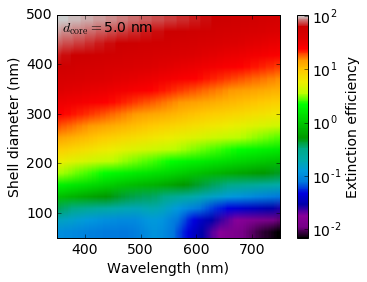

Core diameter 7.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=7.5-nm.svg


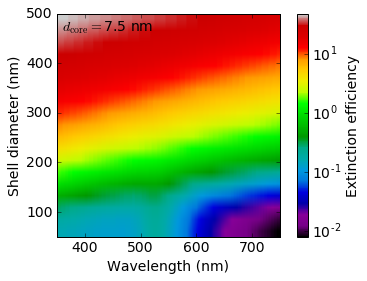

Core diameter 10.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=10.0-nm.svg


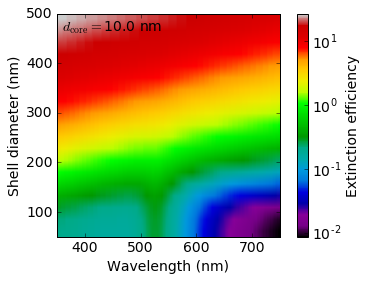

Core diameter 12.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=12.5-nm.svg


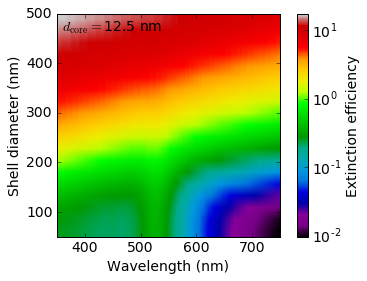

Core diameter 15.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=15.0-nm.svg


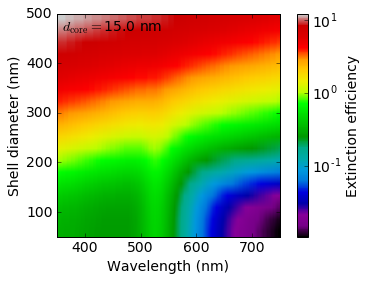

Core diameter 17.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=17.5-nm.svg


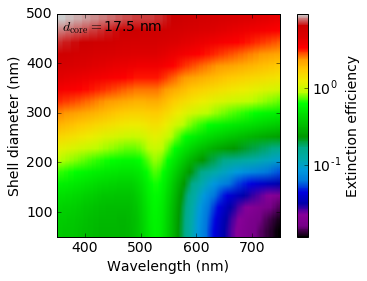

Core diameter 20.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=20.0-nm.svg


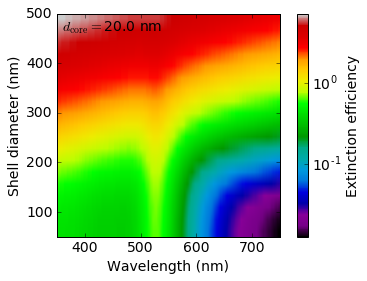

Core diameter 22.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=22.5-nm.svg


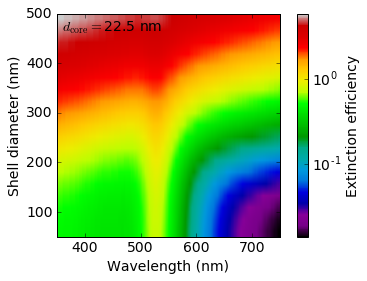

Core diameter 25.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=25.0-nm.svg


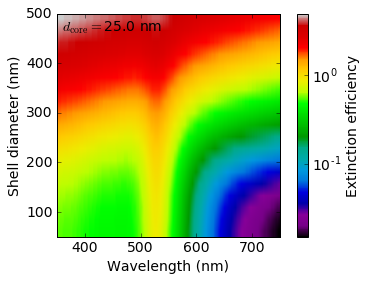

Core diameter 27.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=27.5-nm.svg


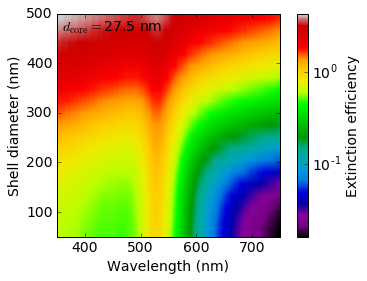

Core diameter 30.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=30.0-nm.svg


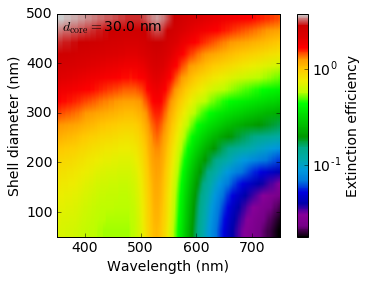

Core diameter 32.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=32.5-nm.svg


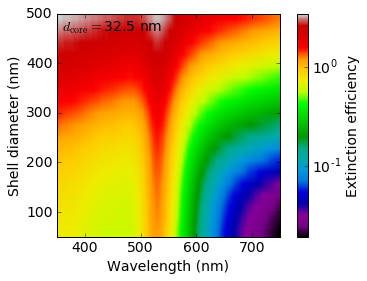

Core diameter 35.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=35.0-nm.svg


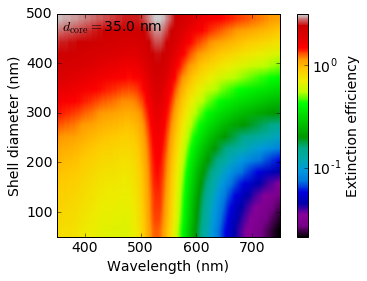

Core diameter 37.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=37.5-nm.svg


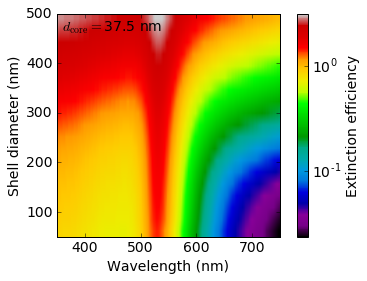

Core diameter 40.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=40.0-nm.svg


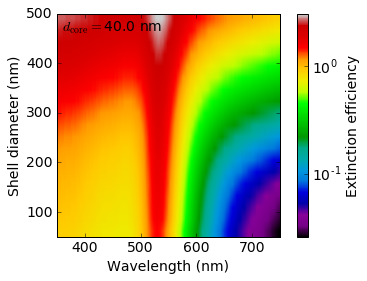

Core diameter 42.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=42.5-nm.svg


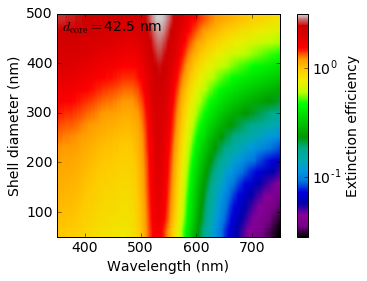

Core diameter 45.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=45.0-nm.svg


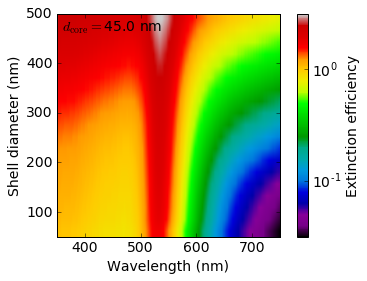

Core diameter 47.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=47.5-nm.svg


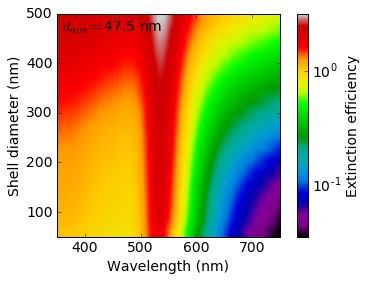

Core diameter 50.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=50.0-nm.svg


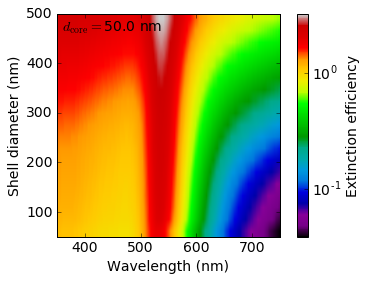

Core diameter 52.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=52.5-nm.svg


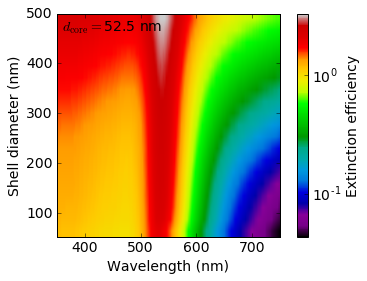

Core diameter 55.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=55.0-nm.svg


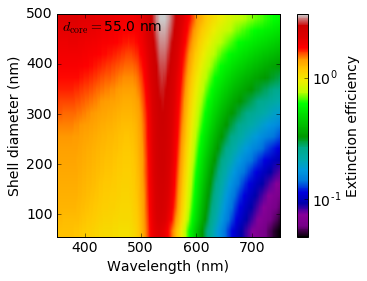

Core diameter 57.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=57.5-nm.svg


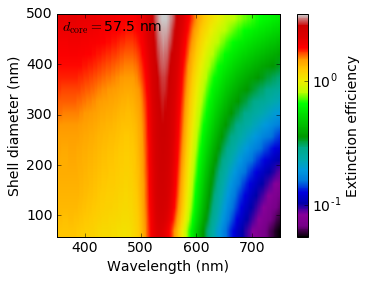

Core diameter 60.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=60.0-nm.svg


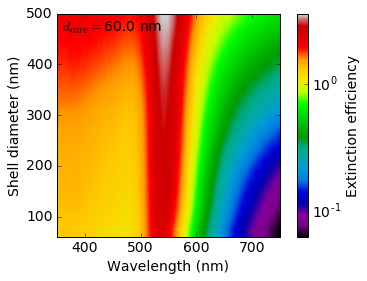

Core diameter 62.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=62.5-nm.svg


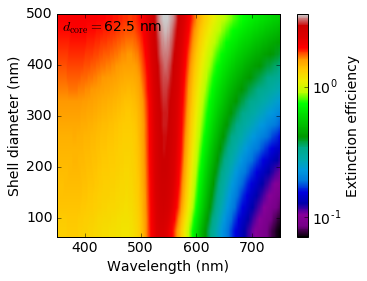

Core diameter 65.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=65.0-nm.svg


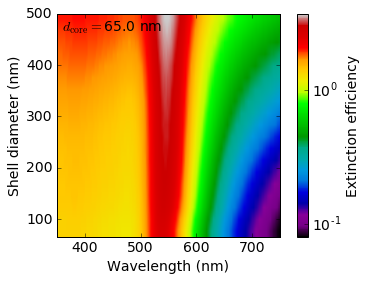

Core diameter 67.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=67.5-nm.svg


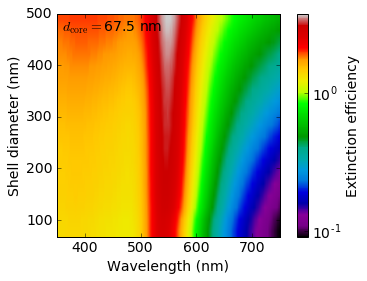

Core diameter 70.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=70.0-nm.svg


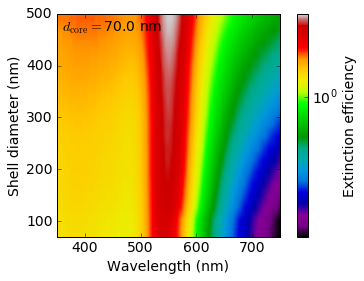

Core diameter 72.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=72.5-nm.svg


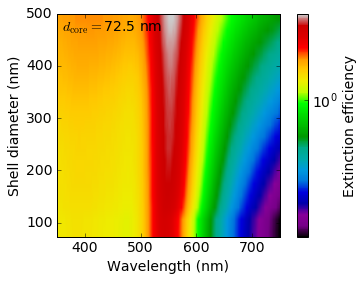

Core diameter 75.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=75.0-nm.svg


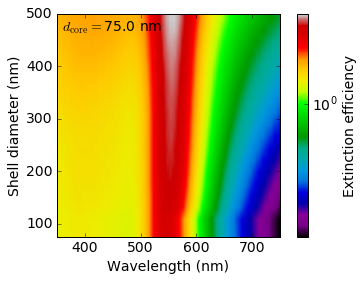

Core diameter 77.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=77.5-nm.svg


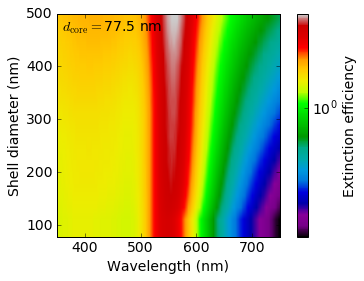

Core diameter 80.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=80.0-nm.svg


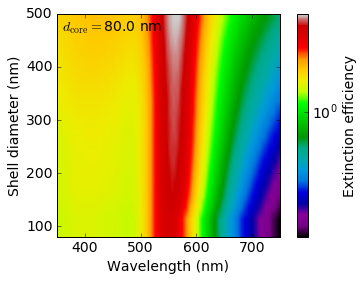

Core diameter 82.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=82.5-nm.svg


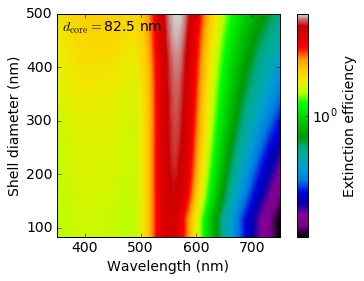

Core diameter 85.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=85.0-nm.svg


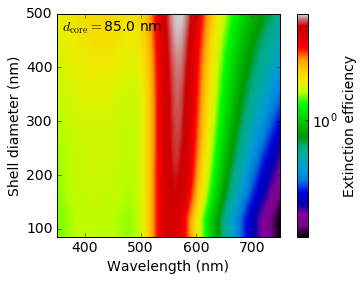

Core diameter 87.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=87.5-nm.svg


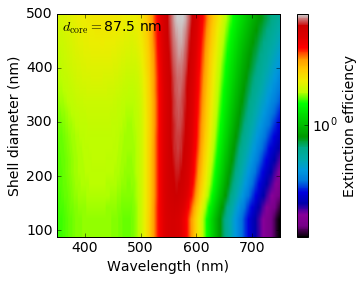

Core diameter 90.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=90.0-nm.svg


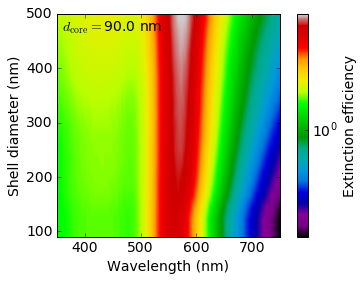

Core diameter 92.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=92.5-nm.svg


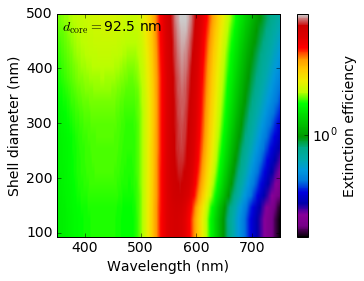

Core diameter 95.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=95.0-nm.svg


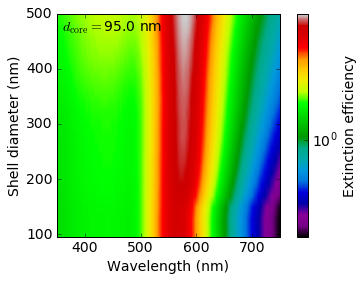

Core diameter 97.5 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=97.5-nm.svg


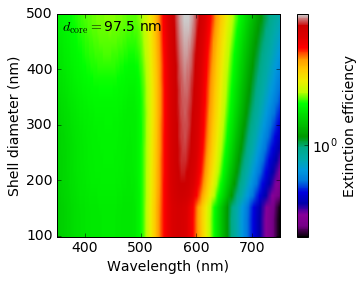

Core diameter 100.0 nm
Exported to:
 graphics_ext-3d-color_vs_shell-size+wavelength_20160818/core-size=100.0-nm.svg


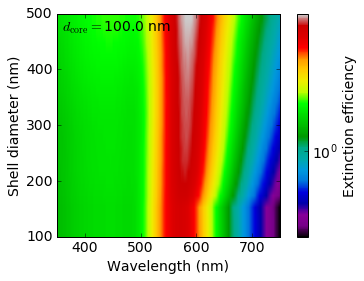

In [234]:
print('Extinction efficiency')
print('3D/color graphs by core diameter')
print('=================================')
for dCorenm in 2*rCoreListnm:
    print("Core diameter "+str(dCorenm)+" nm")
    def plotAndSave (): 
        ## Input data
        sortByCore = spectraAuLSPRArray[:,1] == dCorenm
        plotArray = spectraAuLSPRArray[sortByCore]
        x,y,z = plotArray[:,0], plotArray[:,2], plotArray[:,-1]
        xLimits = [np.amin(x), np.amax(x)]
        yLimits = [np.amin(y), np.amax(y)]
        dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
        zLimits = [np.amin(z), np.amax(z)]
        z = np.reshape(z, (rShellListnm.size,wl0Listnm.size))

        ## Specific format options
        plot = pylab.imshow(z,extent=(xLimits[0],xLimits[1],yLimits[1],yLimits[0]),cmap=cm.spectral, norm=LogNorm())
        pylab.xlabel("Wavelength (nm)")
        pylab.ylabel("Shell diameter (nm)")
        zLabel = "Extinction efficiency"
        figText = '$d_{\mathrm{core}}=$'+str(dCorenm)+' nm'
        pylab.text(xLimits[0]+0.025*dx, yLimits[1]-0.025*dy, figText, verticalalignment='top', horizontalalignment='left')

        ## General format options
        aspectRatio = dx/dy
        figWidthcm = 8.9
        figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
        fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
        pylab.subplot(111)
        pylab.rcParams.update({'font.size': 14})
        pylab.axes().set_aspect(aspectRatio)
        pylab.xlim(xLimits[0], xLimits[1])
        pylab.ylim(yLimits[0], yLimits[1])
        pylab.locator_params(nbins=7)
        cb = pylab.colorbar(plot,orientation='vertical')
        cb.set_label(zLabel)

        ## Save and display
        timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
        exportFormat = '.svg'
        foldername = "graphics_"+"ext-3d-color_vs_shell-size+wavelength_" + timestamp
        filename = "core-size="+str(dCorenm)+"-nm" + exportFormat
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        pylab.savefig(foldername+"/"+filename, transparent=True)
        print("Exported to:\n", foldername+"/"+filename)
        pylab.show()
    
    plotAndSave() 


### 4.1.3 LSPR analysis

Analysis of extinction spectra for LSPR peak position, including: 
1. core/shell sizes with an undetectable LSPR peak, i.e., dominated by the shell; 
1. LSPR peak position as a function of core and shell size (3D/color);
2. the LSPR peak position as a function of core and shell size (2D/line).

In [257]:
print("LSPR analysis")
print("=============")
print("Peak detection and sorting")
threshold = 0.25
print('Detection threshold set to',format(100*threshold, '.1f')+"%")
lsprAllListnm = []
detectThresholdDiamShellnm = []
lsprListnm = []
for rCorenm in rCoreListnm:
    subArrayPeaks = []
    for rShellnm in rShellListnm:
        sortByCore = spectraAuLSPRArray[:,1] == [2*rCorenm]
        subArray = spectraAuLSPRArray[sortByCore]
        sortByShell = subArray[:,2] == [2*rShellnm]
        subArray = subArray[sortByShell]
        if subArray.size > 0:
            x, y = subArray[:,0], subArray[:,-1]
            base = peakutils.baseline(y,2)
            yCorr = y - base
            indexes = peakutils.indexes(y, thres=threshold, min_dist=3)
            indexesCorr = peakutils.indexes(yCorr, thres=threshold, min_dist=3)
            if indexes.size > 0: 
                if indexes.size > 1: indexes = [indexes[-1]]
                peak = peakutils.interpolate(x, y, ind=indexes)
                subArrayPeaks.append([2*rShellnm, 2*rCorenm, peak])
                lsprAllListnm.append([2*rShellnm, 2*rCorenm, peak[0]])
            else:
                lsprAllListnm.append([2*rShellnm, 2*rCorenm, 0])
    subArrayPeaks = np.asarray(subArrayPeaks)
    if subArrayPeaks.size > 0:
        detectThresholdDiamShellnm.append([2*rCorenm,np.amax(subArrayPeaks[:,0])])
        # dCore, mean LSPR, smallest shell LSPR, largest shell LSPR
        lsprListnm.append([2*rCorenm, np.mean(subArrayPeaks[:,-1]), subArrayPeaks[0,-1], subArrayPeaks[-1,-1] ])


detectThresholdDiamShellnm0 = detectThresholdDiamShellnm
detectThresholdDiamShellnm = []
for v in detectThresholdDiamShellnm0:
    dc, ds = v
    ds = ds - drShellnm
    if v == detectThresholdDiamShellnm0[0]:
        detectThresholdDiamShellnm.append(v)
        ds0 = ds
    elif ds > ds0:
        detectThresholdDiamShellnm.append(v)
        ds0 = ds

LSPR analysis
Peak detection and sorting
Detection threshold set to 25.0%


Detectable LSPR parameters
polynomial fit: 39.29 , 7.98 , 0.81
Exported to:
 graphics_detectable-shell-size_20160818.svg


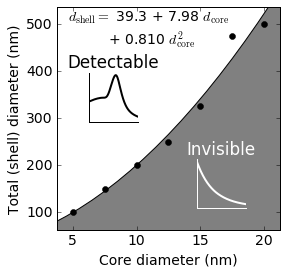

In [258]:
print('Detectable LSPR parameters')
print('===============')
def plotAndSave ():   
    ## Input data
    plotArray = np.asarray(detectThresholdDiamShellnm)
    x, y = plotArray[:,0], plotArray[:,-1]
    xLimits = [np.amin(x)-1*drCorenm, np.amax(x)+1*drCorenm]
    yLimits = [np.amin(y)-3*drShellnm, np.amax(y)+3*drShellnm]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    # Quadratic fit
    [c2,c1,c0] = np.polyfit(x, y, 2)
    print('polynomial fit:',format(c0, '.2f'),',',format(c1, '.2f'),',',format(c2, '.2f'))
    def fit (x0): return c0+c1*x0+c2*x0*x0
    fitx = np.arange(xLimits[0]-1*drCorenm,xLimits[1]+1*drCorenm)
    fity = list(map(fit,list(fitx)))
    
    ## Specific format options
    pylab.plot(x, y, 'o', color='black')
    pylab.fill_between(fitx, 0, fity, facecolor='gray')
    pylab.xlabel("Core diameter (nm)")
    pylab.ylabel("Total (shell) diameter (nm)")
    figText = '$d_{\mathrm{shell}}=$ '+format(c0, '.1f')+' + '+format(c1, '.2f')+' $d_{\mathrm{core}}$'+'\n        '+' + '+format(c2, '.3f')+' $d_{\mathrm{core}}^2$'
    pylab.text(xLimits[0]+0.05*dx, yLimits[1]-0.025*dy, figText, verticalalignment='top', horizontalalignment='left')
    # pylab.legend(loc='upper right', fontsize=14)
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    
    #-------- Inset plots --------
    ## LSPR inset
    px1, py1, dx1, dx2 = 0.3, 0.5, 0.17, 0.17
    lsprInset = fig.add_axes([px1, py1, dx1, dx2])
    # Input data
    dCorenm = 2*rCoreListnm[-1]
    dShellnm = 2*rShellListnm[3]
    sortByShell = spectraAuLSPRArray[:,2] == dShellnm
    plotArray = spectraAuLSPRArray[sortByShell]
    sortByCore = plotArray[:,1] == dCorenm
    plotArray = plotArray[sortByCore]
    x, y = plotArray[:,0], plotArray[:,-2]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [0, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    # Specific format options
    pylab.plot(x, y, color='black', linewidth=2)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.title('Detectable')
    lsprInset.axes.set_aspect(dx/dy)
    lsprInset.axes.get_xaxis().set_visible(False)
    lsprInset.axes.get_yaxis().set_visible(False)
    lsprInset.spines['right'].set_visible(False)
    lsprInset.spines['top'].set_visible(False)
    
    ## Scattering inset
    px1, py1, dx1, dx2 = 0.55, 0.2, 0.17, 0.17
    scaInset = fig.add_axes([px1, py1, dx1, dx2])
    # Input data
    dCorenm = 2*rCoreListnm[0]
    dShellnm = 2*rShellListnm[3]
    sortByShell = spectraAuLSPRArray[:,2] == dShellnm
    plotArray = spectraAuLSPRArray[sortByShell]
    sortByCore = plotArray[:,1] == dCorenm
    plotArray = plotArray[sortByCore]
    x, y = plotArray[:,0], plotArray[:,-3]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [0, np.amax(y)*1.05]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    
    # Specific format options
    pylab.plot(x, y, color='white', linewidth=2)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.title('Invisible', color='white')
    scaInset.axes.set_aspect(dx/dy)
    scaInset.axes.get_xaxis().set_visible(False)
    scaInset.axes.get_yaxis().set_visible(False)
    scaInset.spines['right'].set_visible(False)
    scaInset.spines['top'].set_visible(False)
    scaInset.spines['left'].set_color('white')
    scaInset.spines['bottom'].set_color('white')
    scaInset.patch.set_alpha(0.0)
    
    #-------- End inset plots --------
    
    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics_"+"detectable-shell-size_" + timestamp + exportFormat
    pylab.savefig(filename, transparent=True)
    print("Exported to:\n", filename)
    pylab.show()
    
plotAndSave() 


LSPR peak wavelength
Exported to:
 graphics_lspr-3d-color_vs_shell-size+core-size_20160818.svg


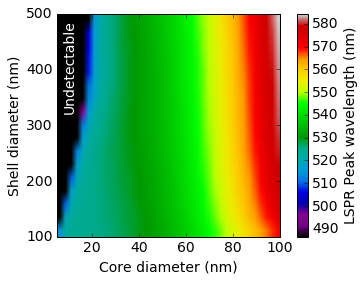

In [259]:
def plotAndSave (): 
    print('LSPR peak wavelength')
    print('====================')
    ## Input data
    lsprAllArraynm = np.asarray(lsprAllListnm)
    plotArray = lsprAllArraynm[:,0] >= np.amax(lsprAllArraynm[:,1])
    plotArray = lsprAllArraynm[plotArray]
    x,y,z = plotArray[:,1], plotArray[:,0], plotArray[:,-1]
    xLimits = [np.amin(x), np.amax(x)]
    yLimits = [np.amin(y), np.amax(y)]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])
    sortByzPos = z[:] > 0
    zGtr0 = z[sortByzPos]
    zLimits = [np.amin(zGtr0)*0.98, np.amax(z)*1.02]
    z = np.transpose(np.reshape(z, (np.unique(x).size,np.unique(y).size)))

    ## Specific format options
    plot = pylab.imshow(z,extent=(xLimits[0],xLimits[1],yLimits[1],yLimits[0]),cmap=cm.spectral, vmin=zLimits[0])
    pylab.xlabel("Core diameter (nm)")
    pylab.ylabel("Shell diameter (nm)")
    zLabel = "LSPR Peak wavelength (nm)"
    figText = 'Undetectable'
    pylab.text(xLimits[0]+0.025*dx, yLimits[1]-0.025*dy, figText, verticalalignment='top', horizontalalignment='left', color='white', rotation='vertical')

    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)
    cb = pylab.colorbar(plot,orientation='vertical')
    cb.set_label(zLabel)

    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics_"+"lspr-3d-color_vs_shell-size+core-size_" + timestamp + exportFormat
    pylab.savefig(filename, transparent=True)
    print("Exported to:\n", filename)
    pylab.show()

plotAndSave() 

LSPR peak wavelength
Exported to:
 graphics_lspr-wl_vs_core-size_20160818.svg


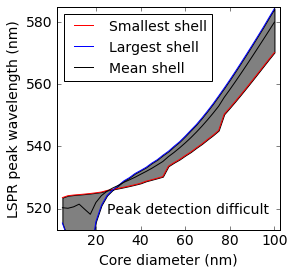

In [260]:
def plotAndSave (): 
    print('LSPR peak wavelength')
    print('====================')
    ## Input data
    plotArray = np.asarray(lsprListnm)
    x, y, ymin, ymax = plotArray[:,0], plotArray[:,1], plotArray[:,2], plotArray[:,3]
    xLimits = [np.amin(x)-2*drCorenm, np.amax(x)+2*drCorenm]
    yLimits = [np.amin(y)-2*dwl0nm, np.amax(y)+2*dwl0nm]
    dx, dy = abs(xLimits[1]-xLimits[0]), abs(yLimits[1]-yLimits[0])

    ## Specific format options
    pylab.fill_between(x, ymin, ymax, facecolor='gray')
    pylab.plot(x, ymin, color='red', label='Smallest shell')
    pylab.plot(x, ymax, color='blue', label='Largest shell')
    pylab.plot(x, y, color='black', label='Mean shell')
    pylab.xlabel("Core diameter (nm)")
    pylab.ylabel("LSPR peak wavelength (nm)")
    pylab.legend(loc='upper left', fontsize=14)
    figText = 'Peak detection difficult'
    pylab.text(x[6]+0.05*dx, ymax[6]+0.025*dy, figText, verticalalignment='bottom', horizontalalignment='left')
    
    ## General format options
    aspectRatio = dx/dy
    figWidthcm = 8.9
    figSizein = [figWidthcm/2.54, aspectRatio*figWidthcm/2.54]
    fig = pylab.figure(1, figsize=(figSizein[0],figSizein[1]))
    pylab.subplot(111)
    pylab.rcParams.update({'font.size': 14})
    pylab.axes().set_aspect(aspectRatio)
    pylab.xlim(xLimits[0], xLimits[1])
    pylab.ylim(yLimits[0], yLimits[1])
    pylab.locator_params(nbins=7)

    ## Save and display
    timestamp = ('{:%Y%m%d}'.format(datetime.datetime.now()))
    exportFormat = '.svg'
    filename = "graphics_"+"lspr-wl_vs_core-size_" + timestamp + exportFormat
    pylab.savefig(filename, transparent=True)
    print("Exported to:\n", filename)
    pylab.show()

plotAndSave() 